# Lab 07-1. Learning rate and Evaluation

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
tf.set_random_seed(777)  # for reproducibility

In [ ]:
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

In [ ]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

In [ ]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [ ]:
# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [ ]:
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5).minimize(cost) # 0.1

In [ ]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 5.73203 [[-0.30548966  1.2298503  -0.6603353 ]
 [-4.3906994   2.2967086   2.993868  ]
 [-3.345107    2.0974321  -0.80419576]]
1 23.149357 [[ 0.06951034  0.2944969  -0.0999819 ]
 [-1.9531994  -1.6362796   4.489356  ]
 [-0.9076071  -1.6502013   0.5059378 ]]
2 27.279776 [[ 0.44451004  0.8569968  -1.0374815 ]
 [ 0.4842999   0.9887202  -0.573143  ]
 [ 1.5298924   1.1622987  -4.7440615 ]]
3 8.668001 [[ 0.12396115  0.61504626 -0.47498214]
 [ 0.22003001 -0.24700856  0.9268558 ]
 [ 0.96035093  0.41934097 -3.431562  ]]
4 5.771078 [[-0.95243055  1.130377    0.08607876]
 [-3.786515    2.2624536   2.4239388 ]
 [-3.0717096   3.1403794  -2.1205401 ]]
5 inf [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
6 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
7 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
8 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
9 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
10 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
11 nan [[nan nan nan]
 [nan nan nan]
 [na

In [ ]:
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

In [ ]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
1 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
2 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
3 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
4 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
5 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
6 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
7 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0

- lr = 1e-10
  학습율이 너무 작아서 학습이 거의 진행되지 않음 혹은 지역 최소값 문제가 발생한 것으로 추측 가능

In [ ]:
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 5.73203 [[ 0.7288166   0.7153621  -1.1801533 ]
 [-0.5775373  -0.1298833   1.6072978 ]
 [ 0.48373488 -0.51433605 -2.02127   ]]
1 3.317995 [[ 0.6621908   0.74796313 -1.1461285 ]
 [-0.81948906  0.03000022  1.689366  ]
 [ 0.23214608 -0.33772916 -1.9462881 ]]
2 2.0218027 [[ 0.6434202   0.7412768  -1.1206716 ]
 [-0.8116129  -0.00900117  1.7204912 ]
 [ 0.20866647 -0.35079566 -1.909742  ]]
3 1.9710885 [[ 0.6235321   0.7400823  -1.099589  ]
 [-0.80967706 -0.01636279  1.725917  ]
 [ 0.17870611 -0.3366575  -1.8939198 ]]
4 1.9446772 [[ 0.60733104  0.7366498  -1.0799555 ]
 [-0.79007834 -0.03363193  1.7235874 ]
 [ 0.16691463 -0.33406347 -1.8847224 ]]
5 1.9235673 [[ 0.59031737  0.73510236 -1.0613943 ]
 [-0.77496755 -0.04048848  1.7153332 ]
 [ 0.15076597 -0.32209396 -1.8805432 ]]
6 1.9035922 [[ 0.57437915  0.7326285  -1.0429822 ]
 [-0.75527763 -0.05152001  1.7066748 ]
 [ 0.13977788 -0.31497923 -1.8766699 ]]
7 1.88408 [[ 0.5581266   0.73071784 -1.024819  ]
 [-0.7377567  -0.05928203  1.696916  ]
 [ 0.

# Lab 07-2. Linear_regression_without_min_max

In [ ]:
tf.set_random_seed(777)  # for reproducibility

In [ ]:
import numpy as np

In [ ]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
x_data.shape, y_data.shape

((8, 4), (8, 1))

In [ ]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  163892530000.0 
Prediction:
 [[-284943.75]
 [-573809.2 ]
 [-451356.62]
 [-316344.88]
 [-372861.22]
 [-376002.22]
 [-344605.06]
 [-438801.6 ]]
1 Cost:  1.8006551e+26 
Prediction:
 [[9.4655648e+12]
 [1.9055155e+13]
 [1.4990002e+13]
 [1.0507912e+13]
 [1.2384136e+13]
 [1.2488370e+13]
 [1.1446024e+13]
 [1.4573063e+13]]
2 Cost:  inf 
Prediction:
 [[-3.1374897e+20]
 [-6.3160888e+20]
 [-4.9686392e+20]
 [-3.4829897e+20]
 [-4.1048893e+20]
 [-4.1394393e+20]
 [-3.7939396e+20]
 [-4.8304392e+20]]
3 Cost:  inf 
Prediction:
 [[1.0399634e+28]
 [2.0935528e+28]
 [1.6469226e+28]
 [1.1544840e+28]
 [1.3606211e+28]
 [1.3720732e+28]
 [1.2575525e+28]
 [1.6011143e+28]]
4 Cost:  inf 
Prediction:
 [[-3.4470993e+35]
 [-6.9393634e+35]
 [-5.4589476e+35]
 [-3.8266933e+35]
 [-4.5099625e+35]
 [-4.5479219e+35]
 [-4.1683279e+35]
 [-5.3071100e+35]]
5 Cost:  inf 
Prediction:
 [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
6 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]

# Lab 07-3. Linear_regression_with_min_max

In [ ]:
tf.set_random_seed(777)  # for reproducibility
# 새로운 런타임을 활용해야 한다?

In [ ]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [ ]:
# very important. It does not work without it.
xy = min_max_scaler(xy)
print(xy)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [ ]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [ ]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    _, cost_val, hy_val = sess.run(
        [train, cost, hypothesis], feed_dict={X: x_data, Y: y_data}
    )
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  0.15230925 
Prediction:
 [[ 1.6346191 ]
 [ 0.06613699]
 [ 0.3500818 ]
 [ 0.67072517]
 [ 0.61130744]
 [ 0.61464405]
 [ 0.23171967]
 [-0.1372836 ]]
1 Cost:  0.15230872 
Prediction:
 [[ 1.634618  ]
 [ 0.06613836]
 [ 0.35008252]
 [ 0.670725  ]
 [ 0.6113076 ]
 [ 0.6146443 ]
 [ 0.23171999]
 [-0.13728246]]
2 Cost:  0.15230817 
Prediction:
 [[ 1.6346169 ]
 [ 0.06613982]
 [ 0.35008317]
 [ 0.67072475]
 [ 0.61130774]
 [ 0.6146444 ]
 [ 0.23172033]
 [-0.13728121]]
3 Cost:  0.1523076 
Prediction:
 [[ 1.6346157 ]
 [ 0.06614128]
 [ 0.3500839 ]
 [ 0.67072463]
 [ 0.6113078 ]
 [ 0.6146445 ]
 [ 0.23172063]
 [-0.13728008]]
4 Cost:  0.15230703 
Prediction:
 [[ 1.6346145 ]
 [ 0.06614277]
 [ 0.35008448]
 [ 0.67072445]
 [ 0.61130786]
 [ 0.6146447 ]
 [ 0.23172095]
 [-0.13727888]]
5 Cost:  0.15230647 
Prediction:
 [[ 1.6346133 ]
 [ 0.0661442 ]
 [ 0.35008517]
 [ 0.6707242 ]
 [ 0.611308  ]
 [ 0.6146449 ]
 [ 0.23172128]
 [-0.1372777 ]]
6 Cost:  0.15230596 
Prediction:
 [[ 1.6346122 ]
 [ 0.06614557]
 [ 0.35

# Lab 07-4. Meet MNIST Dataset

In [ ]:
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
tf.set_random_seed(777)  # for reproducibility

In [ ]:
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [ ]:
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [ ]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) # 크로스엔트로피
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [ ]:
# batch_xs, batch_ys = mnist.train.next_batch(100)
# parameters
num_epochs = 15  # 전체 데이터를 1회 학습시키는 것: 1 epoch
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)
num_iterations

550

Epoch: 0001, Cost: 2.749207485
Epoch: 0002, Cost: 1.109081805
Epoch: 0003, Cost: 0.884816759
Epoch: 0004, Cost: 0.776019398
Epoch: 0005, Cost: 0.707681601
Epoch: 0006, Cost: 0.659371437
Epoch: 0007, Cost: 0.621816532
Epoch: 0008, Cost: 0.592268052
Epoch: 0009, Cost: 0.567285722
Epoch: 0010, Cost: 0.546577865
Epoch: 0011, Cost: 0.528652789
Epoch: 0012, Cost: 0.512543236
Epoch: 0013, Cost: 0.498676734
Epoch: 0014, Cost: 0.486690070
Epoch: 0015, Cost: 0.475186907
Learning finished
Accuracy:  0.8879
Label:  [5]
Prediction:  [5]


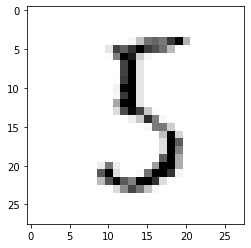

In [ ]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ", 
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )
    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()